<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/Lorenz_Attractors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construction of a Lorenz Attractor
___

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Lorenz Function

In [2]:
def lorenz(X, Y, Z, Sigma=10,Rho=28, Beta=8/3):
  x_dot = Sigma*(Y - X)
  y_dot = Rho*X - Y - X*Z
  z_dot = X*Y - Beta*Z
  return x_dot, y_dot, z_dot

## Time Loop

In [3]:
dt = 0.01
num_steps = 5
x = np.empty(num_steps+1)
y = np.empty(num_steps+1)
z = np.empty(num_steps+1)
x[0], y[0], z[0] = (0,1,1.05)

for i in range(num_steps):
  x_dot,y_dot,z_dot=lorenz(x[i],y[i],z[i])
  x[i+1] = x[i] + (x_dot)*(dt)
  y[i+1] = y[i] + (y_dot)*(dt)
  z[i+1] = z[i] + (z_dot)*(dt)

##Visualisation

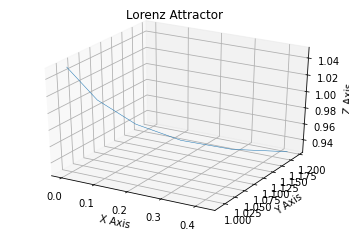

In [4]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x,y,z, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

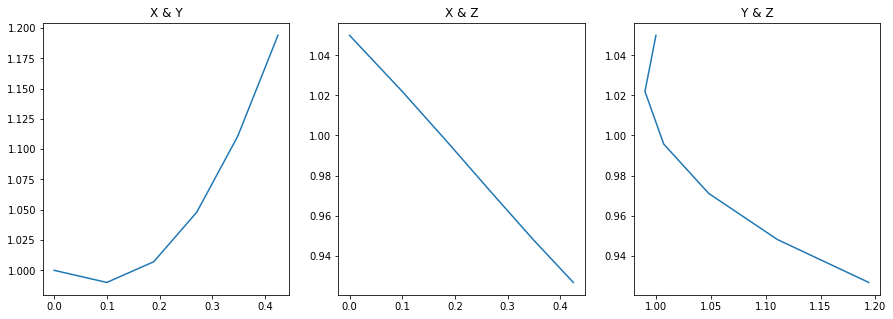

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()

#Formulation of the Time Series
___

##Multivariate Series Formation

In [6]:
x1 = x.reshape((len(x), 1))
y1 = y.reshape((len(y), 1))
z1 = z.reshape((len(z), 1))
T = np.hstack((x1,y1,z1))
print(T)

[[0.         1.         1.05      ]
 [0.1        0.99       1.022     ]
 [0.189      1.007078   0.99573667]
 [0.2708078  1.04804528 0.97108707]
 [0.34853155 1.11076123 0.9480296 ]
 [0.42475452 1.19393827 0.92662016]]


In [9]:
print(T[1][2])
print(len(T[0]))
print(T.ndim)
print(T.shape)

1.022
3
2
(6, 3)


##Dual loop for input

In [37]:
def multivariate(sequence,n_steps):
  X,y = list(), list()
  for i in range (6):
    for j in range (3):
      end_ix = i + n_steps
      if end_ix > 5 :
        break
      seq_x, seq_y = sequence[i:end_ix,j], sequence[end_ix,j]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

X,y = multivariate(T,3)

print(X)

[[0.         0.1        0.189     ]
 [1.         0.99       1.007078  ]
 [1.05       1.022      0.99573667]
 [0.1        0.189      0.2708078 ]
 [0.99       1.007078   1.04804528]
 [1.022      0.99573667 0.97108707]
 [0.189      0.2708078  0.34853155]
 [1.007078   1.04804528 1.11076123]
 [0.99573667 0.97108707 0.9480296 ]]


In [34]:
print(y)

[0.2708078  1.04804528 0.97108707 0.34853155 1.11076123 0.9480296
 0.42475452 1.19393827 0.92662016]


In [59]:
X1=[]
for i in range (3):
  

[0.    0.1   0.189]
[1.       0.99     1.007078]
